# Classification Project : Customer Churn Prediction and Analysis for a Fictional Telco Company

## I. Introduction

In this project, we aim to build a predictive model to determine whether customers of a fictional telecommunications company will churn. Churn analysis helps organizations understand why customers discontinue their services and what factors contribute to this decision. This analysis is crucial for improving customer retention, especially in industries like telecommunications where maintaining a stable customer base is vital.
The dataset contains information about 7043 customers in California, including various demographic details, a Satisfaction Score, a Churn Score, and a Customer Lifetime Value (CLTV) index. Our task is to analyze this data, prepare it for modeling, and build a classification model to predict customer churn


### II. Importing Libraries and Loading the Dataset

First, we import the necessary libraries for data manipulation, visualization, preprocessing, model training, and evaluation.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [5]:
# Load the dataset 

df = pd.read_excel('churn.xlsx')

# Display 10 random rows from the dataset

df.sample(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
6141,1555-HAPSU,1,United States,California,Fresno,93727,"36.751489, -119.68072",36.751489,-119.680720,Female,...,Two year,No,Credit card (automatic),23.90,1663.5,No,0,59,5471,NaN
3917,3470-OBUET,1,United States,California,San Jose,95123,"37.238758, -121.828375",37.238758,-121.828375,Female,...,Two year,No,Credit card (automatic),74.00,4868.4,No,0,35,4188,NaN
4754,5600-KTXFM,1,United States,California,Ventura,93004,"34.278697, -119.167798",34.278697,-119.167798,Male,...,Month-to-month,No,Mailed check,69.95,143.9,No,0,46,5010,NaN
4568,8751-EDEKA,1,United States,California,Rancho Santa Fe,92091,"32.99356, -117.207121",32.993560,-117.207121,Female,...,Month-to-month,No,Credit card (automatic),89.90,2433.5,No,0,55,3676,NaN
147,0719-SYFRB,1,United States,California,Norco,92860,"33.925833, -117.559639",33.925833,-117.559639,Female,...,Month-to-month,Yes,Mailed check,61.65,713.75,Yes,1,67,5670,Competitor offered higher download speeds
3164,1803-BGNBD,1,United States,California,Santa Monica,90402,"34.035849, -118.503508",34.035849,-118.503508,Female,...,Month-to-month,Yes,Electronic check,54.30,654.5,No,0,63,3854,NaN
2139,3583-KRKMD,1,United States,California,San Diego,92115,"32.762506, -117.07245",32.762506,-117.072450,Male,...,Month-to-month,Yes,Bank transfer (automatic),75.90,1373.05,No,0,62,4668,NaN
5008,5939-XAIXZ,1,United States,California,Birds Landing,94512,"38.140719, -121.838298",38.140719,-121.838298,Female,...,Month-to-month,Yes,Mailed check,56.10,1033.9,No,0,27,3367,NaN
4904,4826-TZEVA,1,United States,California,O Neals,93645,"37.140104, -119.657092",37.140104,-119.657092,Female,...,Month-to-month,No,Credit card (automatic),74.80,2971.7,No,0,52,3258,NaN
3927,9838-BFCQT,1,United States,California,San Jose,95139,"37.218705, -121.762429",37.218705,-121.762429,Male,...,Two year,No,Mailed check,26.10,1851.45,No,0,41,5475,NaN


### III. Exploratory Data Analysis (EDA):

#### 1. Inspect the dataset

In [8]:
# Inspect the dataset to understand its structure and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

+ **Dataset:**

    - **Total Entries:** The dataset consists of 7043 entries, representing individual customers.

    - **Data Columns:** There are 33 columns in the dataset, which include a variety of demographic, service-related, and churn-related information.

    - **Non-Null Count:** Most columns have 7043 non-null values, indicating no missing data for these columns. The "Churn Reason" column has only 1869 non-null values, meaning a significant portion of this column contains missing values.
 
+ **Data Types:**

    - **Object:** 24 columns are of type object. These include categorical features such as 'CustomerID', 'Country', 'State', 'City', 'Gender', etc.

    - **Int64:** 6 columns are of type int64. These include numerical features such as 'Count', 'Zip Code', 'Tenure Months', 'Churn Value', 'Churn Score', and 'CLTV'.

    - **Float64:** 3 columns are of type float64. These include numerical features such as 'Latitude', 'Longitude', and 'Monthly Charges'.

+ **Notes :**

    - **CustomerID:** Each entry has a unique customer ID.
    
    - **Count, Country, State:** These columns have consistent non-null values indicating they are constant across all records.
    
    - **Latitude, Longitude:** Geographical coordinates are in float64 format, which is appropriate.
    
    - **Monthly Charges: Also correctly in float64 format.**
    
    - **Total Charges:** This column is currently of type object and should be converted to a numerical type.
    
    - **Churn Reason:** Contains a significant number of missing values (only 1869 non-null out of 7043), which needs to be addressed in the data cleaning process.

#### 2. Handling Missing Values and Data Type Conversion

In [11]:
df[df['Total Charges'] == ' '][['CustomerID', 'Total Charges', 'Tenure Months', 'Churn Score']]

,CustomerID,Total Charges,Tenure Months,Churn Score
2234,4472-LVYGI,,0,36
2438,3115-CZMZD,,0,68
2568,5709-LVOEQ,,0,45
2667,4367-NUYAO,,0,48
2856,1371-DWPAZ,,0,30
4331,7644-OMVMY,,0,53
4687,3213-VVOLG,,0,49
5104,2520-SGTTA,,0,27
5719,2923-ARZLG,,0,69
6772,4075-WKNIU,,0,44


Customers with no value in total charges col because they have 0 tenure months which means they are new to the company, so we can fill in with 0 on these missing values and then convert to numeric type

In [13]:
# Replace ' ' to '0'

df['Total Charges'] = df['Total Charges'].replace(' ', '0')

In [14]:
# Fill missing values in "Churn Reason" with "Unknown"

df['Churn Reason'] = df['Churn Reason'].fillna('Unknown')

In [15]:
# Convert "Total Charges" to numeric

df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Recheck data types

df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [16]:
df.isna().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
Churn Reason         0
dtype: int64

+ **Handling Missing Values:**

    - The missing values in the "Churn Reason" column are filled with the string 'Unknown'.

+ **Data Type Conversion:**

    - The "Total Charges" column, initially of type object, is converted to a numeric type (float64).

### 3. Data Visualization

#### 3.1. Distribution of the Target Variable (Churn)

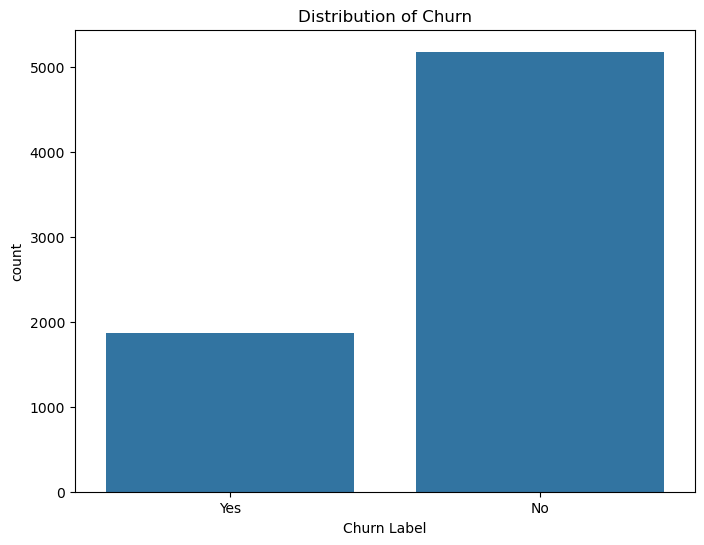

In [20]:
# Distribution of the target variable (Churn)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn Label')
plt.title('Distribution of Churn')
plt.show()

+ The count plot shows that the majority of customers have not churned ("No" appears 5174 times) compared to those who have churned ("Yes" appears 1869 times).

+ This imbalance means that non-churned customers constitute about 73.5% of the total customer base, while churned customers make up about 26.5%.

#### 3.2. Visualize the Distribution of Numerical Features

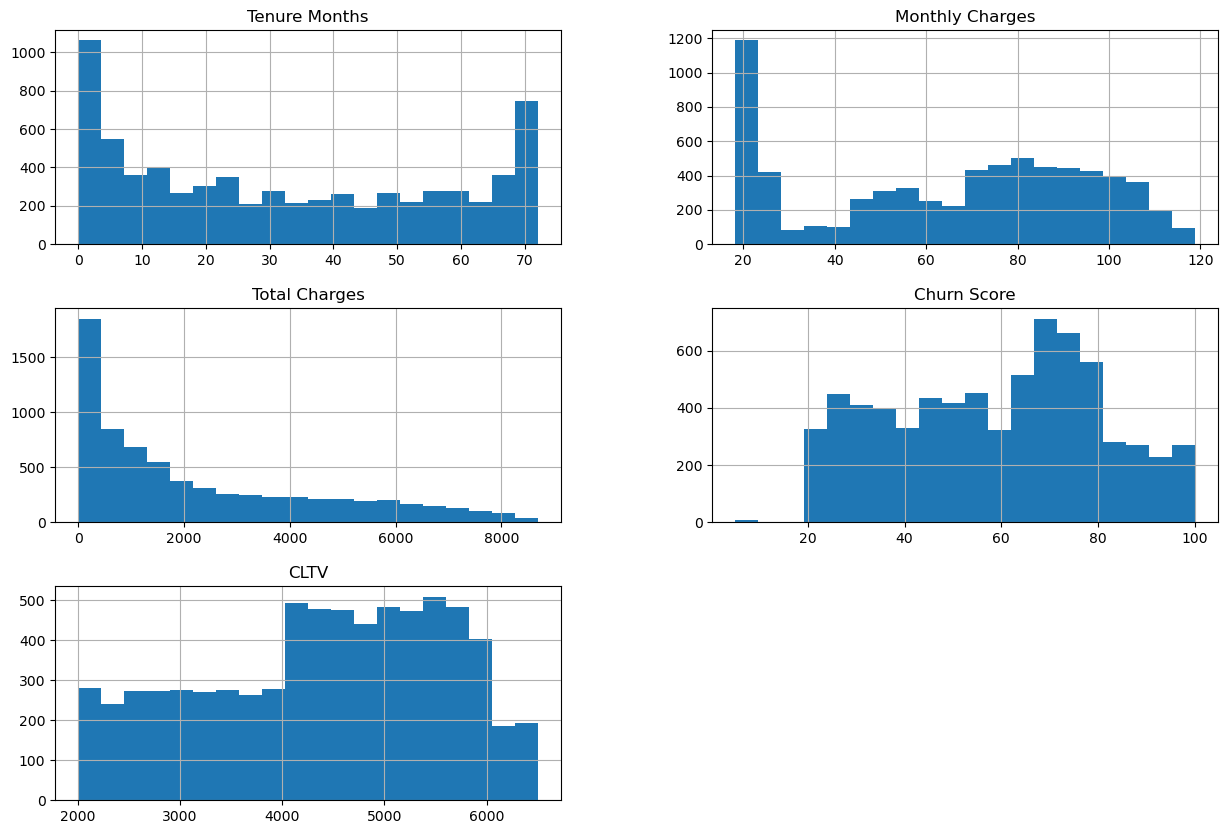

In [23]:
numerical_features = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']
df[numerical_features].hist(figsize=(15, 10), bins=20)
plt.show()

+ **Tenure Months:**

The distribution shows the tenure of customers in months. There is a relatively even distribution with slight peaks at certain points, possibly indicating some customers stay longer due to specific contracts or loyalty.

+ **Monthly Charges:**

The distribution of monthly charges shows a concentration of values around 20-100.There are peaks at around 20-30 and 70-100, indicating common pricing tiers or service packages.

+ **Total Charges:**

The distribution of total charges shows a right-skewed distribution. Most customers have total charges below $4000, with a few high-paying customers driving the tail.

+ **Churn Score:**

The churn score distribution is roughly uniform, indicating a spread of churn likelihood across different customers. The scores range from low to high, with no particular concentration, suggesting various risk levels across the customer base.

+ **CLTV (Customer Lifetime Value):**

The CLTV distribution is also right-skewed. Most customers have a CLTV below $5000, with a smaller number having significantly higher values, indicating their importance to the company.

#### 3.3. Relationship of Churn with Total Charges 

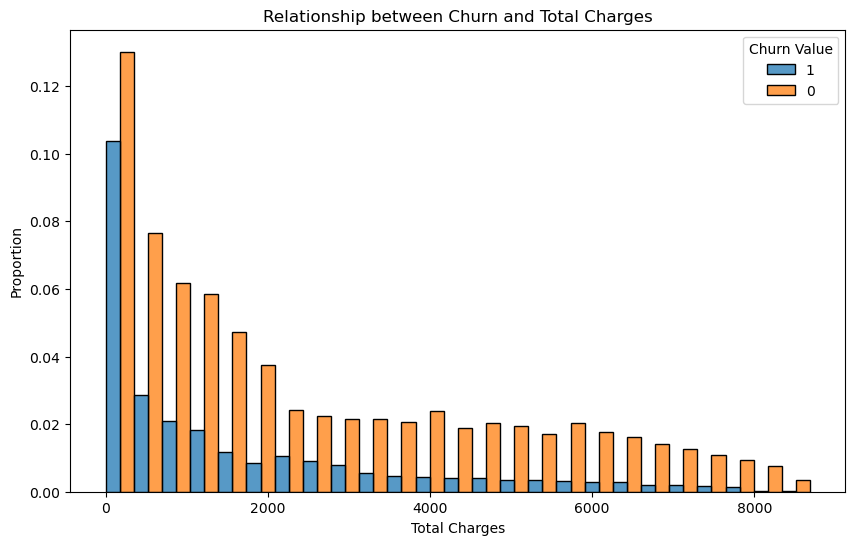

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total Charges', hue='Churn Value', hue_order=[1,0], multiple='dodge', stat='proportion')
plt.title('Relationship between Churn and Total Charges')
plt.xlabel('Total Charges')
plt.show()

- There is a higher likelihood of churn among customers with lower total charges.
- Customers with higher total charges are less likely to churn.
- The proportion of non-churn customers increases steadily as total charges increase.

This suggests that customers with higher total charges are more likely to remain with the service, potentially indicating satisfaction with the service or greater investment in it. Conversely, customers with lower total charges might be less engaged or satisfied, leading to a higher likelihood of churn.

#### 3.4. Relationship of Churn with Senior Citizen

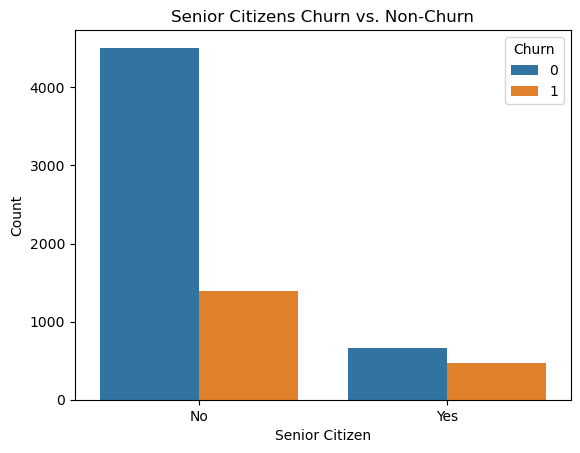

In [29]:
sns.countplot(x='Senior Citizen', hue='Churn Value', data=df)
plt.title('Senior Citizens Churn vs. Non-Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [30]:
# Define a function to calculate the Churn rate
def calculate_churn_rate(df, group_col, group_val, churn_col='Churn Value', churn_val=1, inverse=False):
    
    # Filter the DataFrame for the specified group or its inverse
    if inverse:
        group = df[df[group_col] != group_val]
    else:
        group = df[df[group_col] == group_val]
    
    # Filter the group for those who have churned
    group_churn = group[group[churn_col] == churn_val]
    
    # Calculate the percentage of the specified group who have churned
    percentage_of_group_churn = len(group_churn) / len(group) if len(group) > 0 else 0
    
    return percentage_of_group_churn

In [31]:
# Calculate the churn rate in the Senior Citizen col
percentage_of_senior_churn = calculate_churn_rate(df, group_col='Senior Citizen', group_val='Yes')
percentage_of_non_senior_churn = calculate_churn_rate(df, group_col='Senior Citizen', group_val='Yes', inverse=True)

print(f'% of churn in Senior Citizen: {percentage_of_senior_churn: .4f}')
print(f'% of churn in Non-Senior Citizen: {percentage_of_non_senior_churn: .4f}')

% of churn in Senior Citizen:  0.4168
% of churn in Non-Senior Citizen:  0.2361


- ***Churn among Senior Citizens:*** 41.68%
- ***Churn among Non-Senior Citizens:*** 23.61%

Senior citizens have a significantly higher churn rate (41.68%) compared to non-senior citizens (23.61%). This indicates that senior citizens are more likely to leave the service compared to their younger counterparts. Therefore, the company may need to tailor their stratigies to give more support for seniors and ensure the service is  user-friendly and accessible.

#### 3.5 Relationship of Churn with Dependents

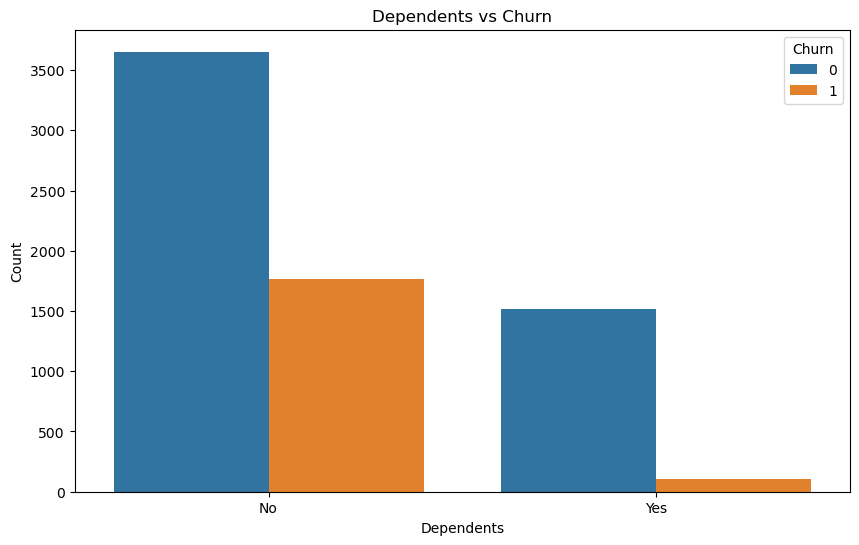

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Dependents', hue='Churn Value', data=df)
plt.title('Dependents vs Churn')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

In [35]:
# Calculate the Churn rate in the Dependents col
percentage_of_dependents_churn = calculate_churn_rate(df, group_col='Dependents', group_val='Yes')
percentage_of_non_dependents_churn = calculate_churn_rate(df, group_col='Dependents', group_val='Yes', inverse=True)

print(f'% of churn in Dependents: {percentage_of_dependents_churn: .4f}')
print(f'% of churn in Non-Dependents: {percentage_of_non_dependents_churn: .4f}')

% of churn in Dependents:  0.0652
% of churn in Non-Dependents:  0.3255


- ***Churn among Dependents:*** 6.52%
- ***Churn among Non-Dependents:*** 32.55%

Customers with dependents have a significantly lower churn rate (6.52%) compared to those without dependents (32.55%). This suggests that customers with dependents are more likely to stay with the service. The company may should give special offers or loyalty programs to increase retention. Sending out surveys or feedback mechanisms to identify and mitigate reasons for dissatisfaction.

### IV. Model Training and Evaluation:

### 1. Prepare Data 

In [39]:
# Create a copy of the original df

df = df.copy()

# Drop the redudant cols

cols_to_drop = ['CustomerID', 'Count', 'Country', 
                'State', 'City', 'Zip Code', 
                'Lat Long', 'Latitude', 'Longitude',
                'Churn Label', 'Churn Reason']

df1 = df.drop(columns=cols_to_drop)

+ 'Customer ID', and 'Count' is used to count the number of customers, and do not affect our y target
+ 'Country' has only one value 'United States'
+ 'State' has only one value 'California'
+ 'Churn Label' has the same value counts as 'Churn Value'
+ 'Churn Reason' is only initialized when the Churn Value is 1 so it's not useful to help us predict target y 
+ 'Lat Long' is the combination of 'Latitude' and 'Longitude', so drop it

In [41]:
# Identify Categorical and Numerical Features

# Create a new df with encoded cols

cols_to_enco = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 
                'Phone Service', 'Multiple Lines', 'Internet Service', 
                'Online Security', 'Online Backup', 'Device Protection', 
                'Tech Support', 'Streaming TV', 'Streaming Movies',
                'Contract', 'Paperless Billing', 'Payment Method' ]

encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the data
encoded_columns = encoder.fit_transform(df[cols_to_enco])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(cols_to_enco))

# Combine the original DataFrame (excluding the columns that were encoded) with the new encoded DataFrame
df_encoded = pd.concat([df1.drop(columns=cols_to_enco), encoded_df], axis=1)

In [42]:
df_encoded.columns

Index(['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV', 'Gender_Male', 'Senior Citizen_Yes',
       'Partner_Yes', 'Dependents_Yes', 'Phone Service_Yes',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No internet service', 'Online Security_Yes',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No internet service', 'Device Protection_Yes',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Streaming TV_No internet service', 'Streaming TV_Yes',
       'Streaming Movies_No internet service', 'Streaming Movies_Yes',
       'Contract_One year', 'Contract_Two year', 'Paperless Billing_Yes',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')

<Axes: xlabel='Monthly_Tenure_Product', ylabel='Total Charges'>

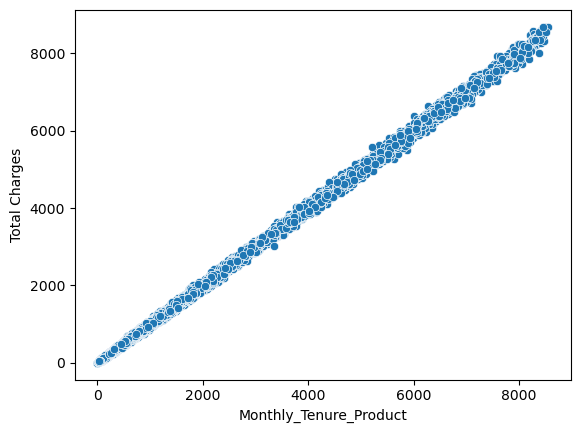

In [43]:
# Scatterplot showing the relationship of 'Monthly Charges'*'Tenure Months' and 'Total Charges'

# Create a new column 
df['Monthly_Tenure_Product'] = df['Monthly Charges'] * df['Tenure Months']
# Scatterplot
sns.scatterplot(data=df, x='Monthly_Tenure_Product', y='Total Charges')

Based on the plot, the product of Monthly Charges and Tenure Months shows a linear relationship with Total Charges. Since this relationship is linear and straightforward, including the Total Charges column might introduce redundancy in the data. Therefore, we decide to drop 'Total Charges' from our model.

***Features Selection***

- Add On Service: Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies
- Payment Method: Credit Card(automatic), Bank Transfer(automatic), Electronic Check, Mail Check
- Paperless Billing


***Summary***: 
We decide to drop all add-on services, Payment Method, and Paperless Billing cols based on Classification report results, which will show at the end.

In [46]:
cols_to_drop =['Total Charges', 'Multiple Lines_No phone service',
               'Online Security_No internet service', 
               'Online Security_Yes',
               'Online Backup_No internet service', 
               'Online Backup_Yes',
               'Device Protection_No internet service', 
               'Device Protection_Yes',
               'Tech Support_No internet service', 
               'Tech Support_Yes',
               'Streaming TV_No internet service', 
               'Streaming TV_Yes',
               'Streaming Movies_No internet service',
               'Streaming Movies_Yes',
               'Paperless Billing_Yes',
               'Payment Method_Credit card (automatic)',
               'Payment Method_Electronic check', 
               'Payment Method_Mailed check']

df_encoded = df_encoded.drop(columns=cols_to_drop)

In [47]:
df_encoded.columns

Index(['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score',
       'CLTV', 'Gender_Male', 'Senior Citizen_Yes', 'Partner_Yes',
       'Dependents_Yes', 'Phone Service_Yes', 'Multiple Lines_Yes',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')

### 2. First Model - KNN 

In [49]:
# Separate X and y features
X = df_encoded.drop('Churn Value', axis=1)
y = df_encoded['Churn Value']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()
# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Create a list to be applied in pipeline sequence
tools = [('scaler', scaler), ('knn', knn)]

pipe = Pipeline(tools)

# set k values 
k_values = list(range(10, 20, 5))

# Grid search
param_grid = {'knn__n_neighbors': k_values, 
              'knn__weights': ['uniform', 'distance'],
              'knn__p': np.linspace(1,2,5)}

# Grid Search
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=10, scoring='accuracy')

# Fit the model
full_cv_classifier.fit(X_train,y_train)

# Best Parameters 
print(f'Best Parameters: {full_cv_classifier.best_estimator_.get_params()}')
print('\n')

# Predict on X_test
y_pred = full_cv_classifier.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
print('\n')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Best Parameters: {'memory': None, 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=15, p=1.0, weights='distance'))], 'verbose': False, 'scaler': StandardScaler(), 'knn': KNeighborsClassifier(n_neighbors=15, p=1.0, weights='distance'), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 15, 'knn__p': 1.0, 'knn__weights': 'distance'}


Confusion Matrix:
[[705  60]
 [ 60 232]]


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       765
           1       0.79      0.79      0.79       292

    accuracy                           0.89      1057
   macro avg       0.86      0.86      0.86      1057
weighted avg       0.89      0.89      0.89      1057



+ **Accuracy** indicates that **89%** of the predictions made by the model are **correct**.

+ For Class **No Churn**:

    + **Precision** : Of all the instances predicted as No Churn, **92%** were actually No Churn.
    + **Recall**: Of all the actual No Churn instances, **92%** were correctly identified by the model.
    + **F1-Score**: indicats a **balanced** performance in identifying No Churn instances.

+ For Class **Churn**:

    + **Precision**: Of all the instances predicted as Churn, **79%** were actually Churn.
    + **Recall**: Of all the actual Churn instances, **79%** were correctly identified by the model.
    + **F1-Score**: indicats a **balanced** performance in identifying Churn instances.

+ **Confusion Matrix**:

    + The model has a good balance between True Positives and True Negatives, with relatively low numbers of False Positives and False Negatives. This balance is crucial for churn prediction as both types of errors can have significant business implications.
    + Class Imbalance: The support values (765 for No Churn and 292 for Churn) indicate some class imbalance. Despite this, the model performs well on both classes, although slightly better on the majority class (No Churn).

+ **Note**: The KNN model with the identified best parameters performs well in predicting customer churn, with high accuracy and balanced precision and recall across both classes. The model is particularly strong in identifying customers who will not churn, while still maintaining good performance in identifying those who will churn.

In [52]:
# Results with all cols included in the df_enoded

#                 precision    recall  f1-score   support

#            0       0.89      0.90      0.89       765
#            1       0.72      0.71      0.72       292

#     accuracy                           0.85      1057
#    macro avg       0.81      0.80      0.81      1057
# weighted avg       0.85      0.85      0.85      1057

+ The model's performance has slightly decreased with all columns included, as indicated by the lower accuracy and macro averages. This suggests that some of the additional features might not be as relevant or might introduce noise into the model.

In [54]:
# Results without 'Payment method' and 'Paperless Billing' cols

#                 precision    recall  f1-score   support

#            0       0.90      0.90      0.90       765
#            1       0.73      0.73      0.73       292

#     accuracy                           0.85      1057
#    macro avg       0.81      0.81      0.81      1057
# weighted avg       0.85      0.85      0.85      1057

+ The removal of 'Payment Method' and 'Paperless Billing' columns did not significantly impact the model's overall performance, as the accuracy remained at 0.85.

In [56]:
# Results that dropping 'Total Charges', 'Payment method', and 'Paperless Billing' cols

#               precision    recall  f1-score   support

#            0       0.89      0.90      0.90       765
#            1       0.74      0.72      0.73       292

#     accuracy                           0.85      1057
#    macro avg       0.82      0.81      0.81      1057
# weighted avg       0.85      0.85      0.85      1057

+ The model performs well in predicting No Churn instances, with high precision and recall, while the performance for Churn instances is moderate. The removal of 'Total Charges', 'Payment Method', and 'Paperless Billing' did not significantly impact the overall accuracy, suggesting that these features were not critical for the model's performance.

### 3. Second Model - LogisitcRgression

In [59]:
# Initialize StandardScaler 
scaler = StandardScaler()

# Initialize LG
lg = LogisticRegression() 

# Create a list to be applied in the pipeline sequence
operations = [('scaler',scaler),('lg',lg)]

pipe = Pipeline(operations)

param_grid = {
    'lg__C': [0.01, 0.1, 1],  # Regularization strength
    'lg__solver': ['liblinear', 'lbfgs', 'saga'],  # Regularization type
    'lg__max_iter':[500, 1000]
}

# Grid Search
grid_search = GridSearchCV(pipe, param_grid, cv=5)  
# Fit the model
grid_search.fit(X_train, y_train)

# Best Parameters 
print(f'Best Parameters: {grid_search.best_params_}')
print('\n')

y_pred_2 = grid_search.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_2)
print('Confusion Matrix:')
print(cm)
print('\n')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_2))

Best Parameters: {'lg__C': 0.1, 'lg__max_iter': 500, 'lg__solver': 'liblinear'}


Confusion Matrix:
[[707  58]
 [ 47 245]]


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       765
           1       0.81      0.84      0.82       292

    accuracy                           0.90      1057
   macro avg       0.87      0.88      0.88      1057
weighted avg       0.90      0.90      0.90      1057



+ **Accuracy**: The model correctly classifies 90% of the instances, indicating a high overall performance.
+ Class **No Churn**:
    + **Precision**: Of all instances predicted as No Churn, **94%** were correct.
    + **Recall**: Of all actual No Churn instances, **92%** were correctly identified.
    + **F1-Score**: This indicates a very strong and **balanced** performance for identifying No Churn instances.
+ Class **Churn**:
    + **Precision**: Of all instances predicted as Churn, **81%** were correct.
    + **Recall**: Of all actual Churn instances, **84%** were correctly identified.
    + **F1-Score**: This indicates a strong performance for identifying Churn instances, better than previous models.

### 4. Third Model - Random Forest

In [62]:
random_forest = RandomForestClassifier(random_state=42)

# Train and evaluate Random Forest
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
print('Random Forest Classification Report:')
print(classification_report(y_test,y_pred_random_forest))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       765
           1       0.86      0.85      0.86       292

    accuracy                           0.92      1057
   macro avg       0.90      0.90      0.90      1057
weighted avg       0.92      0.92      0.92      1057



+ **Accuracy**: The model correctly classifies **92%** of the instances, indicating a high overall performance.
+ Class **No Churn**:
    + **Precision**: Of all instances predicted as No Churn, **94%** were correct.
    + **Recall**: Of all actual No Churn instances, **95%** were correctly identified.
    + **F1-Score**: Indicates a very strong and **balanced** performance for identifying No Churn instances.
+ Class **Churn**:
    + **Precision**: Of all instances predicted as Churn, **86%** were correct.
    + **Recall**: Of all actual Churn instances, **85%** were correctly identified.
    + **F1-Score**: Indicates a **strong** performance for identifying Churn instances.

**Conclusion** : Based on the performance metrics, the **Random Forest** model performs the best overall, with the highest accuracy, precision, recall, and F1-score, especially in identifying both No Churn and Churn instances.

### V. Hyperparameter Tuning with GridSearchCV

Optimize the Random Forest model using GridSearchCV to find the best hyperparameters and evaluate its performance.

In [67]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
             }

In [68]:
# Initialize GridSearchCV with Random Forest
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [69]:
# Get the best parameters and best estimator
best_params = grid_search.best_params_
print("The best parameters :",best_params)

The best parameters : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [70]:
best_random_forest = grid_search.best_estimator_

# Evaluate the best model

y_pred_best_rf = best_random_forest.predict(X_test)
print('Best Random Forest Classification Report:')
print(classification_report(y_test,y_pred_best_rf))

Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       765
           1       0.86      0.84      0.85       292

    accuracy                           0.92      1057
   macro avg       0.90      0.89      0.90      1057
weighted avg       0.92      0.92      0.92      1057



+ The Random Forest model demonstrates high accuracy of 92% in predicting customer churn.
+ The performance metrics (precision, recall, F1-score) for both classes are strong, with particularly high performance for the No Churn class.
+ The Churn class also shows good performance, but with slightly lower precision and recall compared to the No Churn class.
+ Overall, the model is reliable and effective in predicting customer churn, with a balanced performance across both classes.

### VI. Making Predictions on New Data

Use the trained Random Forest model to make predictions on new data.

#### 1. Prepare New Input Data

In [75]:
# New input data
new_input = {'Gender': 'Male',
             'Senior Citizen': 'Yes',
             'Partner': 'Yes',
             'Dependents': 'Yes',
             'Tenure Months': 34,
             'Phone Service': 'Yes',
             'Multiple Lines': 'Yes',
             'Internet Service': 'Fiber optic',
             'Monthly Charges': 108.9,
             'Churn Value': 0,  # Drop this column later
             'Churn Score': 24,
             'CLTV': 5151,
             'Contract': 'Month-to-month'}

In [76]:
# Convert dictionary to DataFrame
new_input_df = pd.DataFrame([new_input])

# Drop the target column 'Churn Value'
new_input_df = new_input_df.drop('Churn Value', axis=1)

#### 2. Encode and Standardize New Input Data

In [81]:
# Encode categorical cols
cols_to_enco = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 
                'Phone Service', 'Multiple Lines', 'Internet Service', 'Contract']
                 
encoder = OneHotEncoder(sparse_output=False)

# Encode categorical columns
encoded_new_columns = encoder.fit_transform(new_input_df[cols_to_enco])
encoded_new_df = pd.DataFrame(encoded_new_columns, columns=encoder.get_feature_names_out(cols_to_enco))

# Combine the original DataFrame with encoded columns
new_df_encoded = pd.concat([new_input_df.drop(columns=cols_to_enco), encoded_new_df], axis=1)

In [83]:
# Add any missing columns with default values (0)
expected_columns = X_train.columns
for col in expected_columns:
    if col not in new_df_encoded.columns:
        new_df_encoded[col] = 0

# Reorder the columns to match the expected order
new_df_encoded = new_df_encoded[expected_columns]

#### 3. Make Predictions Using The Trained Model (Random Forest)

In [86]:
# Make predictions using the fitted scaler and encoder
y_predict = best_random_forest.predict(new_df_encoded)

# Interpretation of the prediction result
if y_predict[0] == 0:
    print(f"The prediction result is {y_predict[0]}, which means the customer will not churn.")
else:
    print(f"The prediction result is {y_predict[0]}, which means the customer will churn.")

The prediction result is 0, which means the customer will not churn.


### VII. Conclusion: 

In this project, we successfully built and evaluated several models to predict customer churn for a fictional telecommunications company. Our analysis included data preprocessing, exploratory data analysis, feature engineering, and model training. We tested various classification algorithms, including K-Nearest Neighbors, Logistic Regression, and Random Forests. The Random Forest model with hyperparameter tuning provided the best performance.

By accurately predicting customer churn, the company can proactively address customer issues, improve retention strategies, and ultimately increase profitability. This project demonstrates the importance of churn analysis and predictive modeling in customer relationship management.